In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
train_labels[10]

3

In [28]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [29]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [31]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [33]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 247us/sample - loss: 2.6354 - acc: 0.4285 - val_loss: 1.7853 - val_acc: 0.6190
Epoch 2/20
7982/7982 [==============================] - 2s 216us/sample - loss: 1.4758 - acc: 0.6874 - val_loss: 1.3206 - val_acc: 0.7150
Epoch 3/20
7982/7982 [==============================] - 2s 249us/sample - loss: 1.0892 - acc: 0.7669 - val_loss: 1.1473 - val_acc: 0.7380
Epoch 4/20
7982/7982 [==============================] - 2s 198us/sample - loss: 0.8507 - acc: 0.8165 - val_loss: 1.0958 - val_acc: 0.7350
Epoch 5/20
7982/7982 [==============================] - 2s 205us/sample - loss: 0.6854 - acc: 0.8543 - val_loss: 0.9678 - val_acc: 0.7910
Epoch 6/20
7982/7982 [==============================] - 1s 183us/sample - loss: 0.5495 - acc: 0.8860 - val_loss: 0.9041 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 1s 183us/sample - loss: 0.4439 - acc: 0.9080 - val_loss: 0.8725 - va

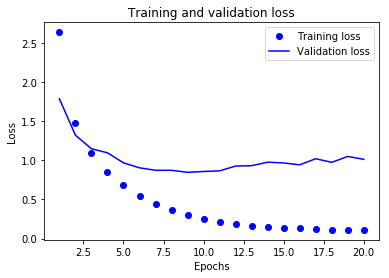

In [34]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

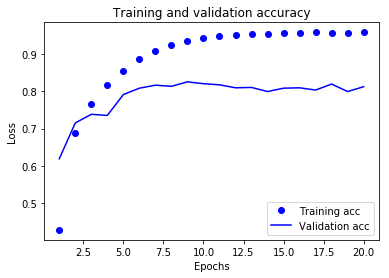

In [35]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# In calssification a matrix has 3 things:
    Accuracy
    Precision
    Recall

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 231us/sample - loss: 2.5941 - acc: 0.5207 - val_loss: 1.7530 - val_acc: 0.6260
Epoch 2/9
7982/7982 [==============================] - 1s 184us/sample - loss: 1.4241 - acc: 0.6971 - val_loss: 1.3049 - val_acc: 0.7090
Epoch 3/9
7982/7982 [==============================] - 1s 187us/sample - loss: 1.0487 - acc: 0.7761 - val_loss: 1.1559 - val_acc: 0.7290
Epoch 4/9
7982/7982 [==============================] - 1s 178us/sample - loss: 0.8302 - acc: 0.8222 - val_loss: 1.0454 - val_acc: 0.7850
Epoch 5/9
7982/7982 [==============================] - 1s 179us/sample - loss: 0.6673 - acc: 0.8553 - val_loss: 0.9807 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 184us/sample - loss: 0.5348 - acc: 0.8857 - val_loss: 0.9385 - val_acc: 0.7990
Epoch 7/9
7982/7982 [==============================] - 1s 186us/sample - loss: 0.4303 - acc: 0.9090 - val_loss: 0.9050 - val_acc: 

# CNN NEWS